<div style="border: 5px solid purple; padding: 15px; margin: 5px">
<b> Reviewer's comment</b>
    
Hi Michael, my name is Svetlana (my handle on Discord is `svetatripleten`). Congratulations on submitting another project! 🎉  I will be using the standard color marking. 
   
    
<div style="border: 5px solid green; padding: 15px; margin: 5px">

Great solutions and ideas that can and should be used in the future are in green comments. You have successfully analyzed the distributions and wrote conclusions in the EDA section, normalized the `review` column, employed advanced techniques such as lemmatization and vectorizing, trained multiple models including a dummy baseline, and applied the `evaluate_model()` method for their assessment. Great job! The results look very good.

</div>
    
<div style="border: 5px solid gold; padding: 15px; margin: 5px">
<b> Reviewer's comment </b>

Yellow color indicates what should be optimized. 
        
</div>
<div style="border: 5px solid red; padding: 15px; margin: 5px">
<b> Reviewer's comment </b>

Issues that must be corrected to achieve accurate results are indicated in red comments. However, there are no such issues, great job! 
</div>        
<hr>
    
<font color='dodgerblue'>**To sum up:**</font> thank you for such an excellent job! You showed strong coding skills and a solid understanding of this topic, which is quite hard. I hope you enjoyed working on this project. You have successfully analyzed the distributions, employed advanced techniques such as lemmatization and vectorizing, and trained several models. The models were trained and evaluated correctly. 
    
I've left several comments, but I do not have any questions, so the project is accepted. 


<hr> 
    
✍️ If you are interested in Large Language Models, check out [Intro to Large Language Models](https://www.youtube.com/watch?v=zjkBMFhNj_g) and [Tokenization lecture](https://www.youtube.com/watch?v=zduSFxRajkE) by Andrej Karpathy, one of the leading scientists in this area.  He has also recently published a nice [Deep Dive into LLMs like ChatGPT](https://www.youtube.com/watch?v=7xTGNNLPyMI) tutorial where he explains all LLM preparation stages and a very useful video about how he uses LLM [here](https://www.youtube.com/watch?v=EWvNQjAaOHw&feature=youtu.be). This is a comprehensive guide on how to choose the optimal tool for your tasks while saving time and money.
 
    
    
I would also like to recommend this new <font color='purple'>**Language Modeling from Scratch Spring 2025 class by Stanford**</font>. This class has just started. There are three links: [Recorded lectures on Youtube](https://www.youtube.com/playlist?list=PLoROMvodv4rOY23Y0BoGoBGgQ1zmU_MT_), [course website](https://stanford-cs336.github.io/spring2025/), and the [GitHub repository with assignments and jupyter notebooks](https://github.com/stanford-cs336). This course is up-to-date, so the information there is super relevant today.

    
    
By the way, Hugging Face has a good free [NLP course](https://huggingface.co/learn/nlp-course/en/chapter0/1).
    
    
Here's a link to [AI for beginners](https://github.com/microsoft/ai-for-beginners) course by Microsoft. 
        
    
    
<hr>
    
Congratulations and good luck! 

</div>

# Project Statement

The Film Junky Union, a new edgy community for classic movie enthusiasts, is developing a system for filtering and categorizing movie reviews. The goal is to train a model to automatically detect negative reviews. You'll be using a dataset of IMBD movie reviews with polarity labelling to build a model for classifying positive and negative reviews. It will need to have an F1 score of at least 0.85.

## Initialization

In [1]:
import math

import numpy as np
import pandas as pd

import re

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

from tqdm.auto import tqdm

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
# the next line provides graphs of better quality on HiDPI screens
%config InlineBackend.figure_format = 'retina'

plt.style.use('seaborn')

In [3]:
# this is to use progress_apply, read more at https://pypi.org/project/tqdm/#pandas-integration
tqdm.pandas()

## Load Data

In [4]:
df_reviews = pd.read_csv('/datasets/imdb_reviews.tsv', sep='\t', dtype={'votes': 'Int64'})

In [5]:
print(df_reviews.head(5))

      tconst title_type primary_title original_title  start_year end_year  \
0  tt0068152      movie             $              $        1971       \N   
1  tt0068152      movie             $              $        1971       \N   
2  tt0313150      short          '15'           '15'        2002       \N   
3  tt0313150      short          '15'           '15'        2002       \N   
4  tt0313150      short          '15'           '15'        2002       \N   

  runtime_minutes  is_adult              genres  average_rating  votes  \
0             121         0  Comedy,Crime,Drama             6.3   2218   
1             121         0  Comedy,Crime,Drama             6.3   2218   
2              25         0  Comedy,Drama,Short             6.3    184   
3              25         0  Comedy,Drama,Short             6.3    184   
4              25         0  Comedy,Drama,Short             6.3    184   

                                              review  rating   sp  pos  \
0  The pakage impl

A quick glance at the dataset shows:
- end_year contains '\N' instead of NAN values
- genres contains multiple categories seperated by a comma

In [6]:
print(df_reviews.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47331 entries, 0 to 47330
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           47331 non-null  object 
 1   title_type       47331 non-null  object 
 2   primary_title    47331 non-null  object 
 3   original_title   47331 non-null  object 
 4   start_year       47331 non-null  int64  
 5   end_year         47331 non-null  object 
 6   runtime_minutes  47331 non-null  object 
 7   is_adult         47331 non-null  int64  
 8   genres           47331 non-null  object 
 9   average_rating   47329 non-null  float64
 10  votes            47329 non-null  Int64  
 11  review           47331 non-null  object 
 12  rating           47331 non-null  int64  
 13  sp               47331 non-null  object 
 14  pos              47331 non-null  int64  
 15  ds_part          47331 non-null  object 
 16  idx              47331 non-null  int64  
dtypes: Int64(1),

- end_year is type object but should be int64
- runtime_minutes is type object but should be int64

In [7]:
# data type conversions:
##### THIS MAY NOT BE NECESSARY #####
#df_reviews['end_year'] = pd.to_numeric(df_reviews['end_year'], errors='coerce').astype('Int64')
#df_reviews['runtime_minutes'] = pd.to_numeric(df_reviews['runtime_minutes'], errors='coerce').astype('Int64')
#print(df_reviews.info())

In [8]:
# checking for duplicates:
print(f'Duplicates: {df_reviews.duplicated().sum()}')

Duplicates: 0


In [9]:
# checking for missing values:

print(f'Null: \n{df_reviews.isnull().sum()}')

Null: 
tconst             0
title_type         0
primary_title      0
original_title     0
start_year         0
end_year           0
runtime_minutes    0
is_adult           0
genres             0
average_rating     2
votes              2
review             0
rating             0
sp                 0
pos                0
ds_part            0
idx                0
dtype: int64


- average_rating contains two null values
- votes contains two null values

In [10]:
print(df_reviews.describe())

         start_year      is_adult  average_rating         votes        rating  \
count  47331.000000  47331.000000    47329.000000  4.732900e+04  47331.000000   
mean    1989.631235      0.001732        5.998278  2.556292e+04      5.484608   
std       19.600364      0.041587        1.494289  8.367004e+04      3.473109   
min     1894.000000      0.000000        1.400000  9.000000e+00      1.000000   
25%     1982.000000      0.000000        5.100000  8.270000e+02      2.000000   
50%     1998.000000      0.000000        6.300000  3.197000e+03      4.000000   
75%     2004.000000      0.000000        7.100000  1.397400e+04      9.000000   
max     2010.000000      1.000000        9.700000  1.739448e+06     10.000000   

                pos           idx  
count  47331.000000  47331.000000  
mean       0.498954   6279.697999  
std        0.500004   3605.702545  
min        0.000000      0.000000  
25%        0.000000   3162.000000  
50%        0.000000   6299.000000  
75%        1.00000

- end_year has dates prior to start_year

In [11]:
# verifying conversion:

print(df_reviews['sp'].value_counts())
print()
print(df_reviews['pos'].value_counts())
print()
print(f'Ratio of negative reviews to total: {23715/(23715+23616):.2f}')

neg    23715
pos    23616
Name: sp, dtype: int64

0    23715
1    23616
Name: pos, dtype: int64

Ratio of negative reviews to total: 0.50


Summary:
- The dataset has been read.
- review is of type object and contains no missing values
- pos, the target, is of type int64 and contains no missing values

Areas of improvement:
The following have been identified but have not been resolved as the anaylsis focuses only on the review and pos columns
- end_year has dates prior to start_year
- end_year contains '\N' instead of NAN values
- genres contains multiple categories seperated by a comma
- end_year is type object but should be int64
- runtime_minutes is type object but should be int64
- average_rating contains two null values
- votes contains two null values

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
Great! 
</div>

## EDA

Let's check the number of movies and reviews over years.

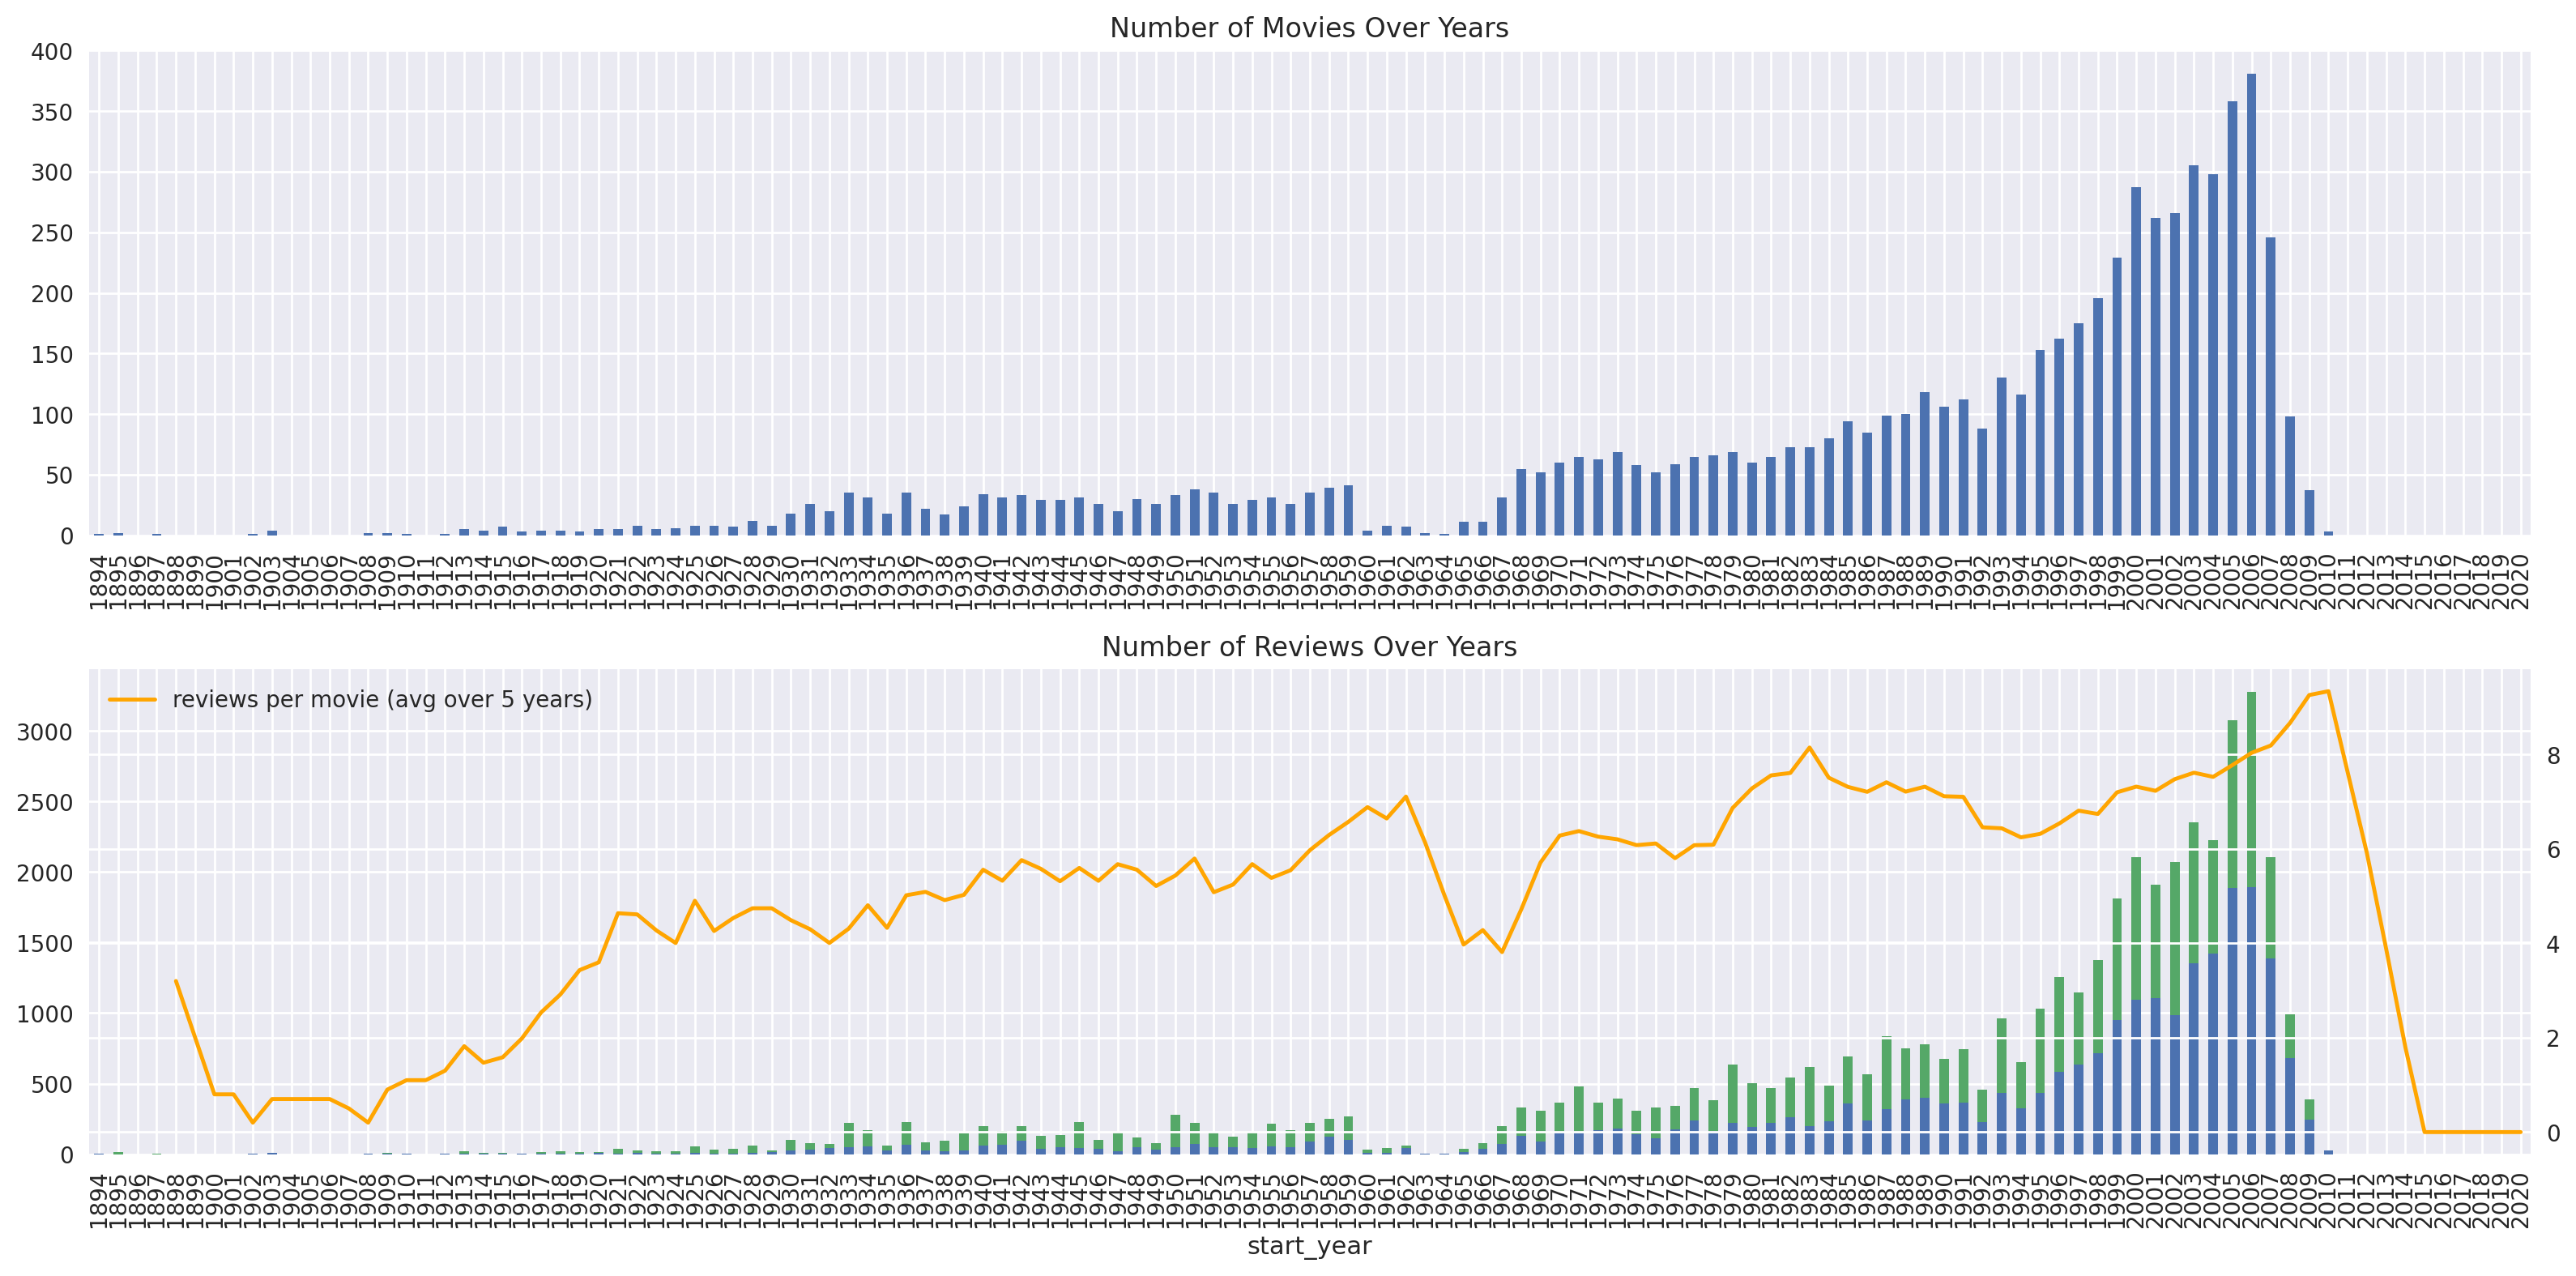

In [12]:
fig, axs = plt.subplots(2, 1, figsize=(16, 8))

ax = axs[0]

dft1 = df_reviews[['tconst', 'start_year']].drop_duplicates() \
    ['start_year'].value_counts().sort_index()
dft1 = dft1.reindex(index=np.arange(dft1.index.min(), max(dft1.index.max(), 2021))).fillna(0)
dft1.plot(kind='bar', ax=ax)
ax.set_title('Number of Movies Over Years')

ax = axs[1]

dft2 = df_reviews.groupby(['start_year', 'pos'])['pos'].count().unstack()
dft2 = dft2.reindex(index=np.arange(dft2.index.min(), max(dft2.index.max(), 2021))).fillna(0)

dft2.plot(kind='bar', stacked=True, label='#reviews (neg, pos)', ax=ax)

dft2 = df_reviews['start_year'].value_counts().sort_index()
dft2 = dft2.reindex(index=np.arange(dft2.index.min(), max(dft2.index.max(), 2021))).fillna(0)
dft3 = (dft2/dft1).fillna(0)
axt = ax.twinx()
dft3.reset_index(drop=True).rolling(5).mean().plot(color='orange', label='reviews per movie (avg over 5 years)', ax=axt)

lines, labels = axt.get_legend_handles_labels()
ax.legend(lines, labels, loc='upper left')

ax.set_title('Number of Reviews Over Years')

fig.tight_layout()

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
    
So we can see a steady increase in the number of movies. The average number of reviews also increases.

</div>

Let's check the distribution of number of reviews per movie with the exact counting and KDE (just to learn how it may differ from the exact counting)

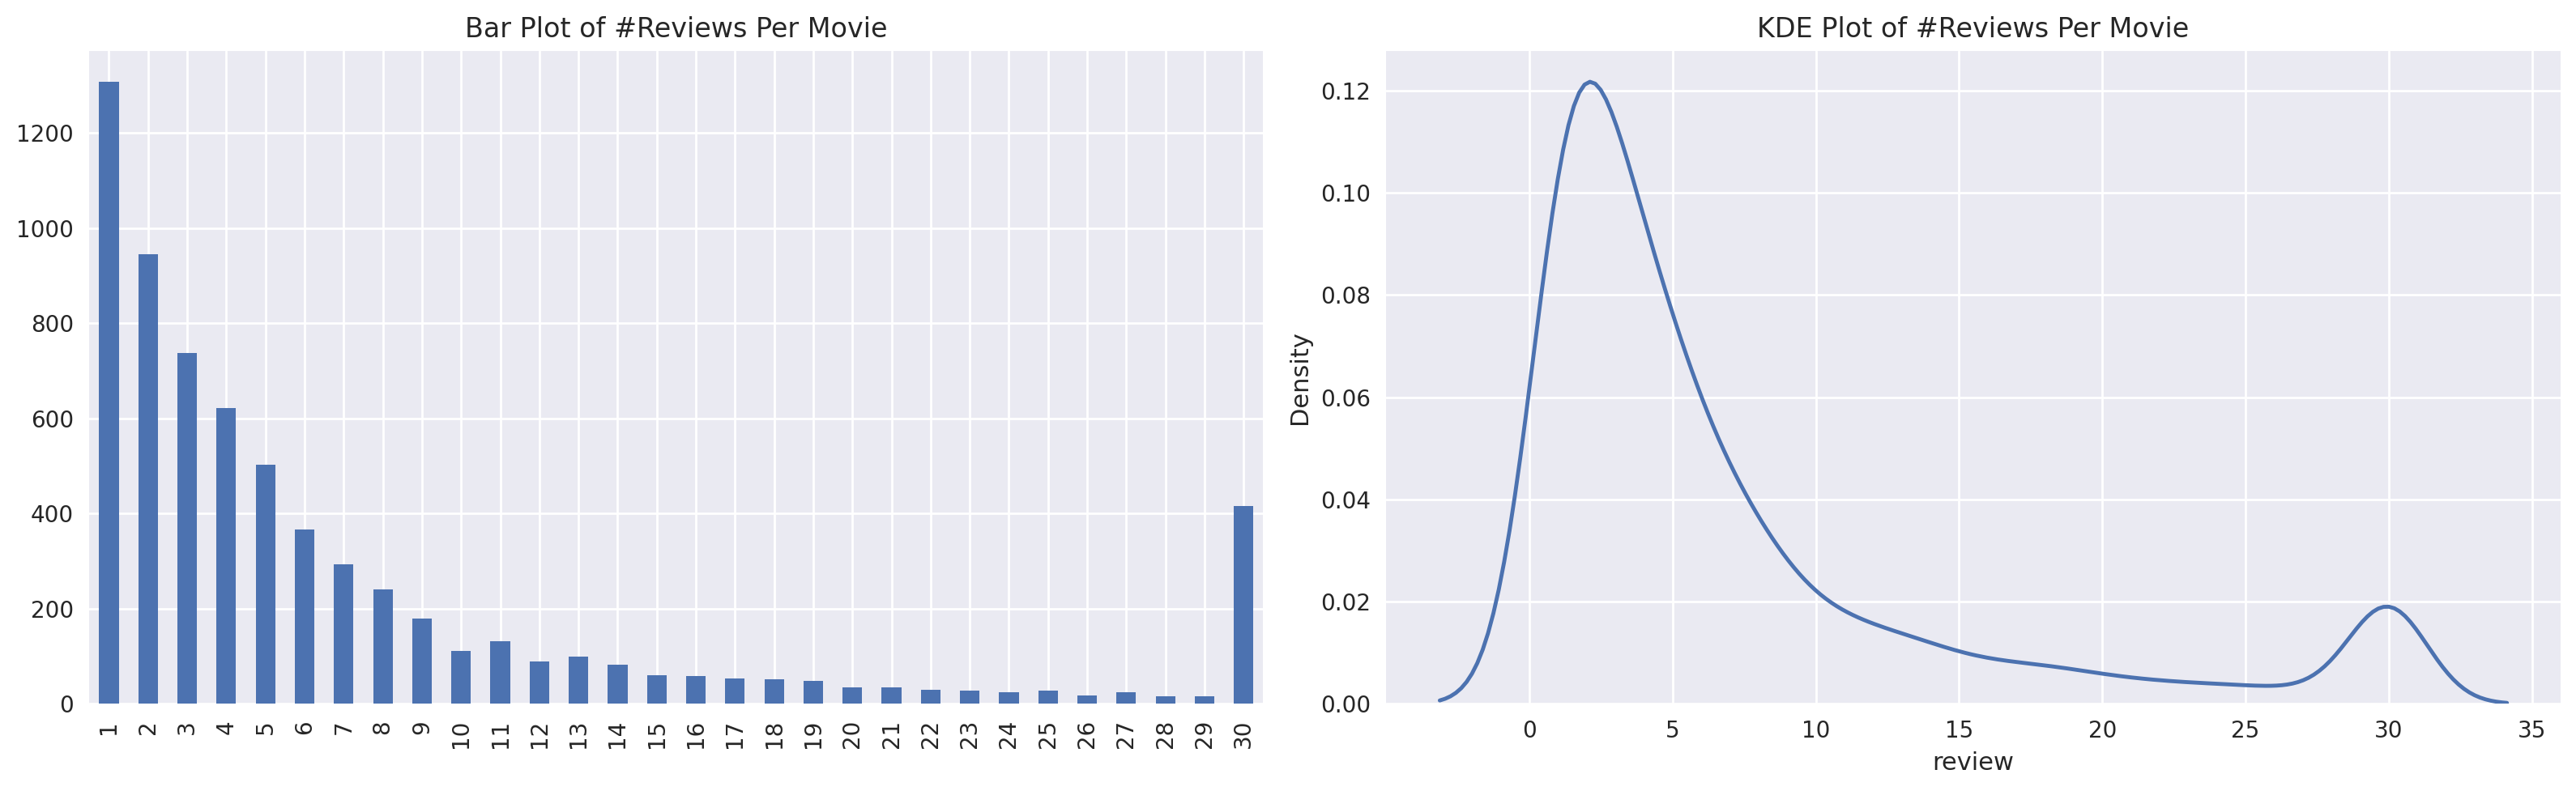

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

ax = axs[0]
dft = df_reviews.groupby('tconst')['review'].count() \
    .value_counts() \
    .sort_index()
dft.plot.bar(ax=ax)
ax.set_title('Bar Plot of #Reviews Per Movie')

ax = axs[1]
dft = df_reviews.groupby('tconst')['review'].count()
sns.kdeplot(dft, ax=ax)
ax.set_title('KDE Plot of #Reviews Per Movie')

fig.tight_layout()

In [14]:
df_reviews['pos'].value_counts()

0    23715
1    23616
Name: pos, dtype: int64

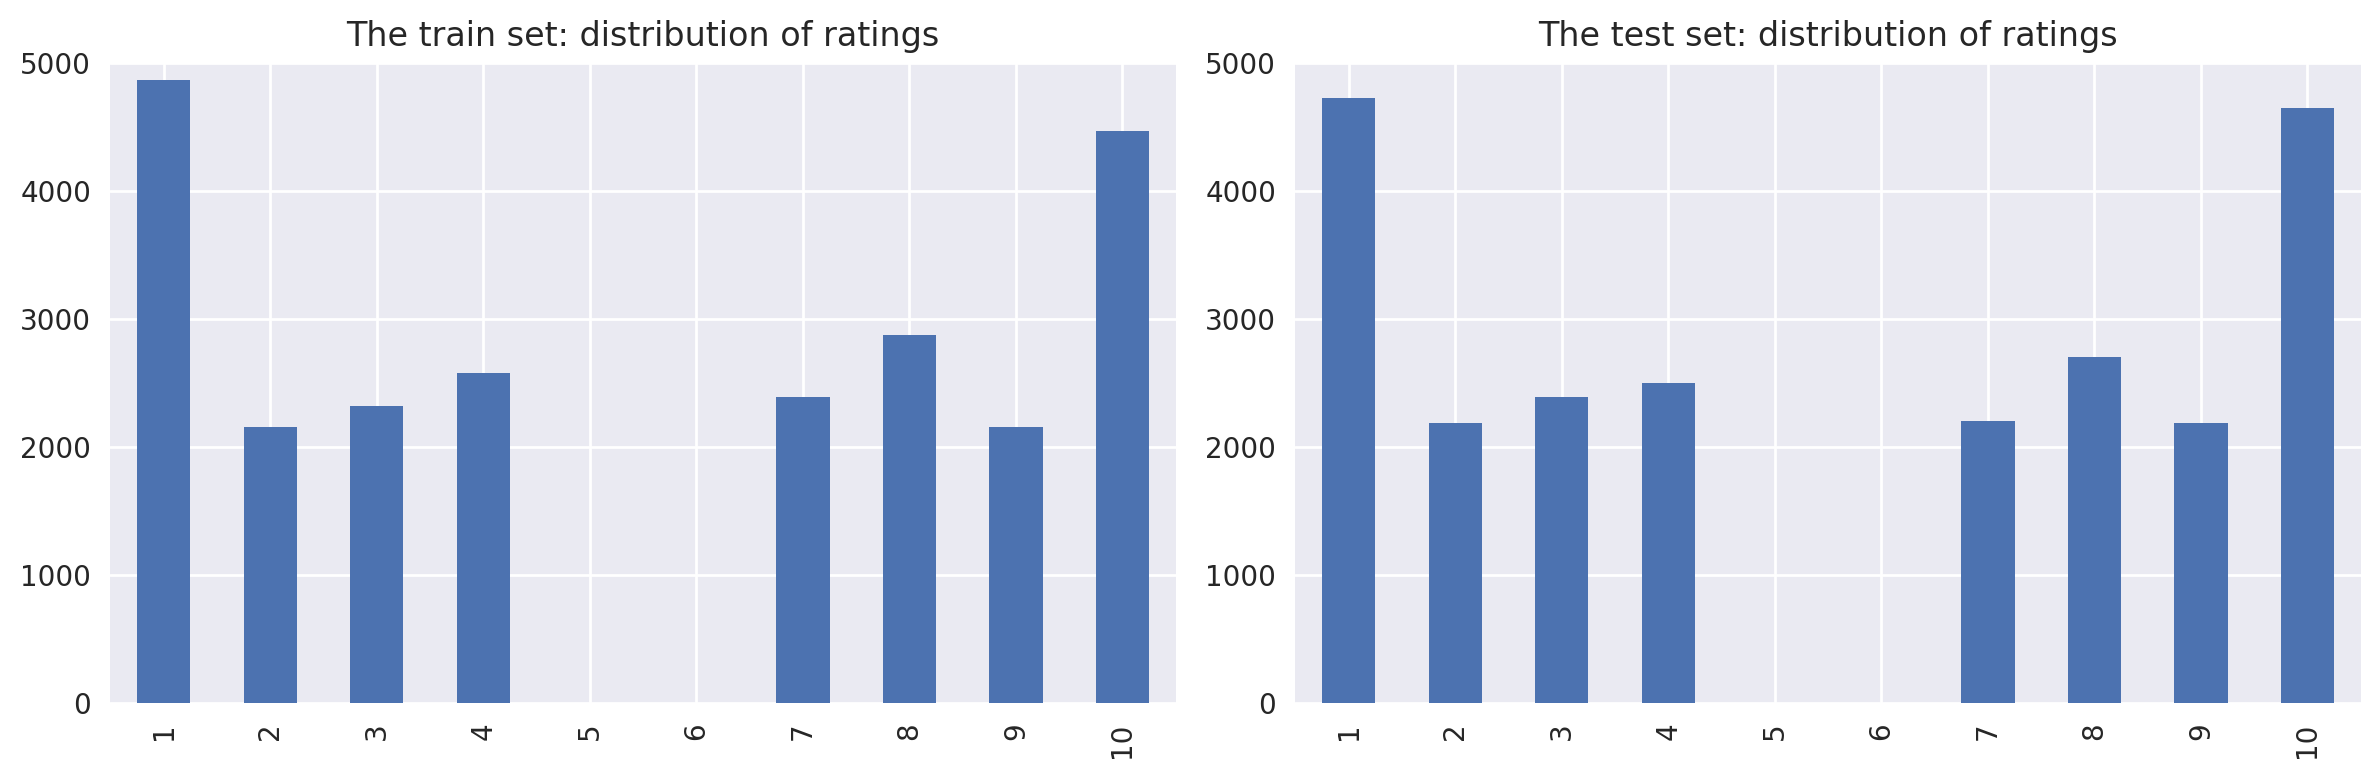

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

ax = axs[0]
dft = df_reviews.query('ds_part == "train"')['rating'].value_counts().sort_index()
dft = dft.reindex(index=np.arange(min(dft.index.min(), 1), max(dft.index.max(), 11))).fillna(0)
dft.plot.bar(ax=ax)
ax.set_ylim([0, 5000])
ax.set_title('The train set: distribution of ratings')

ax = axs[1]
dft = df_reviews.query('ds_part == "test"')['rating'].value_counts().sort_index()
dft = dft.reindex(index=np.arange(min(dft.index.min(), 1), max(dft.index.max(), 11))).fillna(0)
dft.plot.bar(ax=ax)
ax.set_ylim([0, 5000])
ax.set_title('The test set: distribution of ratings')

fig.tight_layout()

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    

So the distrbutions of the training and test sets are quite similar. 

</div>

Distribution of negative and positive reviews over the years for two parts of the dataset

In [16]:
df_reviews.query('ds_part == "train"')['pos'].value_counts() # 50.1% negative

0    11912
1    11884
Name: pos, dtype: int64

In [17]:
df_reviews.query('ds_part == "test"')['pos'].value_counts() # 50.2% negative

0    11803
1    11732
Name: pos, dtype: int64

In [18]:
print(f'Training set distribution: {11912/(11912+11884):.2f}')
print(f'Testing set distribution: {11803/(11803+11732):.2f}')
      

Training set distribution: 0.50
Testing set distribution: 0.50


The distribution of negative and positive reviews is 50% for both the training and testing set.

In [19]:
# get rid of the warning below

import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='seaborn')

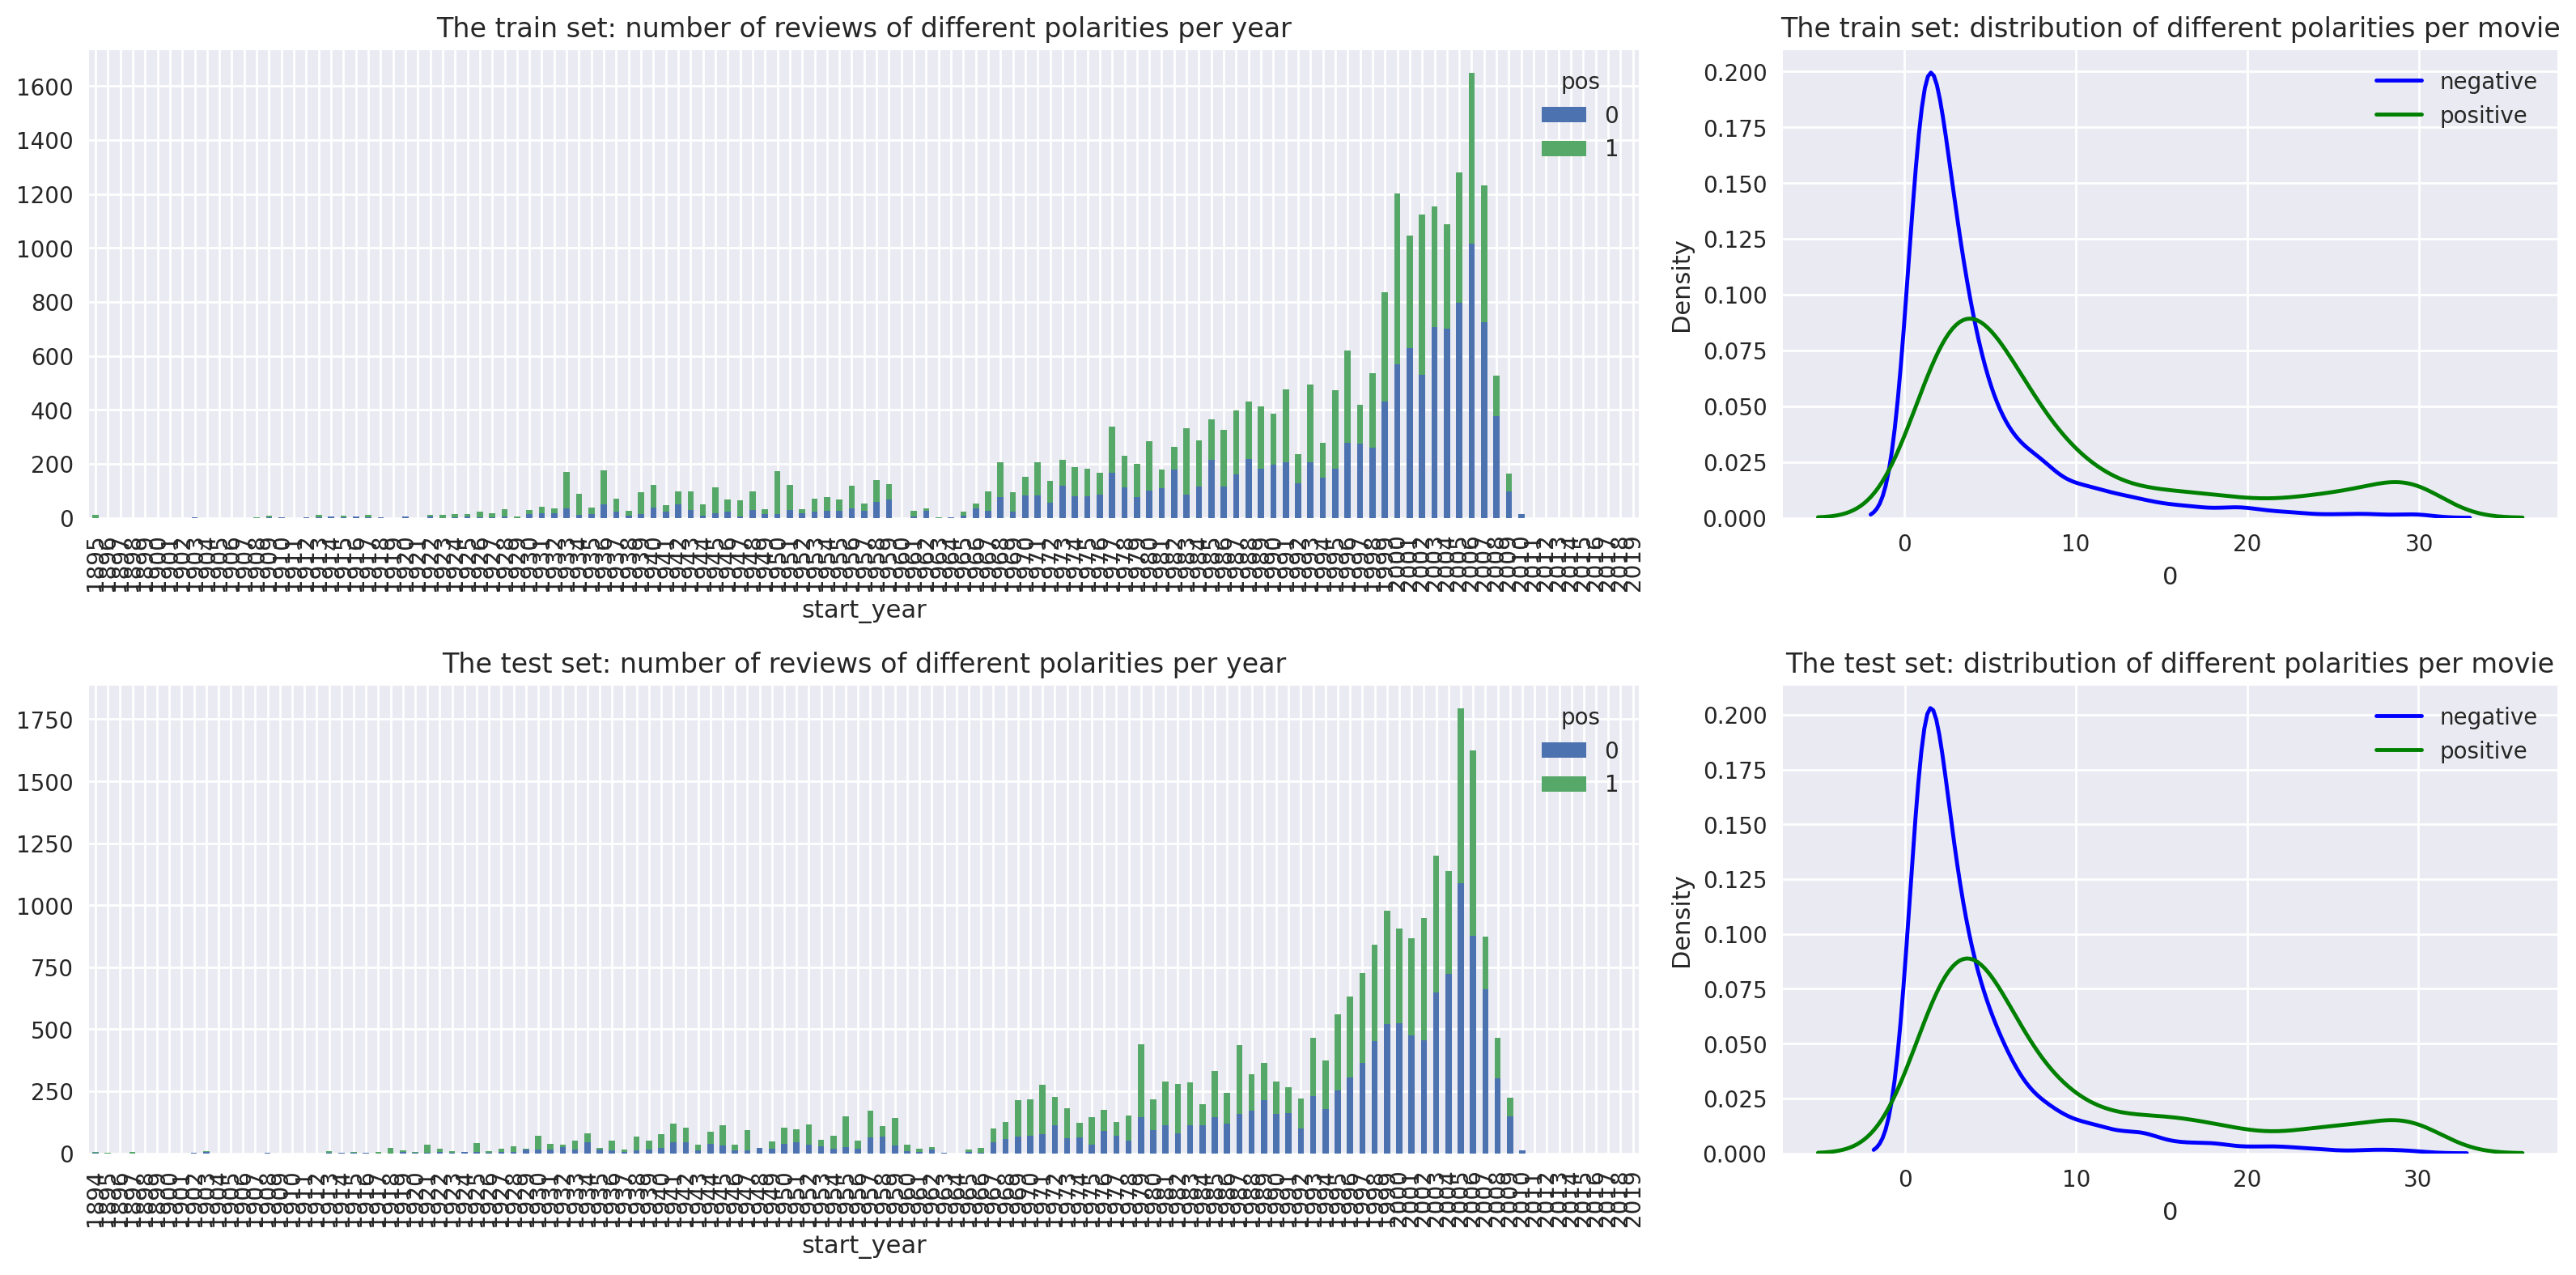

In [20]:
fig, axs = plt.subplots(2, 2, figsize=(16, 8), gridspec_kw=dict(width_ratios=(2, 1), height_ratios=(1, 1)))

ax = axs[0][0]

dft = df_reviews.query('ds_part == "train"').groupby(['start_year', 'pos'])['pos'].count().unstack()
dft.index = dft.index.astype('int')
dft = dft.reindex(index=np.arange(dft.index.min(), max(dft.index.max(), 2020))).fillna(0)
dft.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('The train set: number of reviews of different polarities per year')

ax = axs[0][1]

dft = df_reviews.query('ds_part == "train"').groupby(['tconst', 'pos'])['pos'].count().unstack()
sns.kdeplot(dft[0], color='blue', label='negative', kernel='epa', ax=ax)
sns.kdeplot(dft[1], color='green', label='positive', kernel='epa', ax=ax)
ax.legend()
ax.set_title('The train set: distribution of different polarities per movie')

ax = axs[1][0]

dft = df_reviews.query('ds_part == "test"').groupby(['start_year', 'pos'])['pos'].count().unstack()
dft.index = dft.index.astype('int')
dft = dft.reindex(index=np.arange(dft.index.min(), max(dft.index.max(), 2020))).fillna(0)
dft.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('The test set: number of reviews of different polarities per year')

ax = axs[1][1]

dft = df_reviews.query('ds_part == "test"').groupby(['tconst', 'pos'])['pos'].count().unstack()
sns.kdeplot(dft[0], color='blue', label='negative', kernel='epa', ax=ax)
sns.kdeplot(dft[1], color='green', label='positive', kernel='epa', ax=ax)
ax.legend()
ax.set_title('The test set: distribution of different polarities per movie')

fig.tight_layout()

The training and testing sets have a very similar distribution of negative and positive reviews. 

## Evaluation Procedure

Composing an evaluation routine which can be used for all models in this project

In [21]:
import sklearn.metrics as metrics

def evaluate_model(model, train_features, train_target, test_features, test_target):
    
    eval_stats = {}
    
    fig, axs = plt.subplots(1, 3, figsize=(20, 6)) 
    
    for type, features, target in (('train', train_features, train_target), ('test', test_features, test_target)):
        
        eval_stats[type] = {}
    
        pred_target = model.predict(features)
        pred_proba = model.predict_proba(features)[:, 1]
        
        # F1
        f1_thresholds = np.arange(0, 1.01, 0.05)
        f1_scores = [metrics.f1_score(target, pred_proba>=threshold) for threshold in f1_thresholds]
        
        # ROC
        fpr, tpr, roc_thresholds = metrics.roc_curve(target, pred_proba)
        roc_auc = metrics.roc_auc_score(target, pred_proba)    
        eval_stats[type]['ROC AUC'] = roc_auc

        # PRC
        precision, recall, pr_thresholds = metrics.precision_recall_curve(target, pred_proba)
        aps = metrics.average_precision_score(target, pred_proba)
        eval_stats[type]['APS'] = aps
        
        if type == 'train':
            color = 'blue'
        else:
            color = 'green'

        # F1 Score
        ax = axs[0]
        max_f1_score_idx = np.argmax(f1_scores)
        ax.plot(f1_thresholds, f1_scores, color=color, label=f'{type}, max={f1_scores[max_f1_score_idx]:.2f} @ {f1_thresholds[max_f1_score_idx]:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(f1_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(f1_thresholds[closest_value_idx], f1_scores[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('threshold')
        ax.set_ylabel('F1')
        ax.legend(loc='lower center')
        ax.set_title(f'F1 Score') 

        # ROC
        ax = axs[1]    
        ax.plot(fpr, tpr, color=color, label=f'{type}, ROC AUC={roc_auc:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(roc_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'            
            ax.plot(fpr[closest_value_idx], tpr[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('FPR')
        ax.set_ylabel('TPR')
        ax.legend(loc='lower center')        
        ax.set_title(f'ROC Curve')
        
        # PRC
        ax = axs[2]
        ax.plot(recall, precision, color=color, label=f'{type}, AP={aps:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(pr_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(recall[closest_value_idx], precision[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('recall')
        ax.set_ylabel('precision')
        ax.legend(loc='lower center')
        ax.set_title(f'PRC')        

        eval_stats[type]['Accuracy'] = metrics.accuracy_score(target, pred_target)
        eval_stats[type]['F1'] = metrics.f1_score(target, pred_target)
    
    df_eval_stats = pd.DataFrame(eval_stats)
    df_eval_stats = df_eval_stats.round(2)
    df_eval_stats = df_eval_stats.reindex(index=('Accuracy', 'F1', 'APS', 'ROC AUC'))
    
    print(df_eval_stats)
    
    return

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
I know it was in the precode, but it is a great opportunity to point out the following: 

- According to [PEP8](https://peps.python.org/pep-0008/), we should always put imports at the top of the file.   


- Notice that the **type** veriable is green in the function above. When we see that your variables are green, we should think of another name, since green color indicates that this name is reserved in python. 
    
    
</div>

## Normalization

We assume all models below accepts texts in lowercase and without any digits, punctuations marks etc.

In [22]:
def normalize_review(text):
    pattern = r"[^a-zA-Z']"
    normalize_text = re.sub(pattern, " ", text).split()
    normalize_text = " ".join(normalize_text).lower()
    return normalize_text


In [23]:
df_reviews['review_norm'] = df_reviews['review'].apply(normalize_review)

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
Nice code! If we don't normalize the data, punctuation and digits can create useless tokens such as '12' or '!!', thus increasing dimensionality without adding value. As a result, it may reduce the model's generalization ability.

</div>

## Train / Test Split

Luckily, the whole dataset is already divided into train/test one parts. The corresponding flag is 'ds_part'.

In [24]:
df_reviews_train = df_reviews.query('ds_part == "train"').copy()
df_reviews_test = df_reviews.query('ds_part == "test"').copy()

train_target = df_reviews_train['pos']
test_target = df_reviews_test['pos']

train_features = df_reviews_train['review_norm']
test_features = df_reviews_test['review_norm']

print(df_reviews_train.shape)
print(df_reviews_test.shape)

(23796, 18)
(23535, 18)


Summary:
- An evaluation procedure has been created.
- Reviews have been normalized with only lower case characters
- The data has been split.

## Working with models

### Model 0 - Constant

          train  test
Accuracy    0.5   0.5
F1          0.5   0.5
APS         0.5   0.5
ROC AUC     0.5   0.5


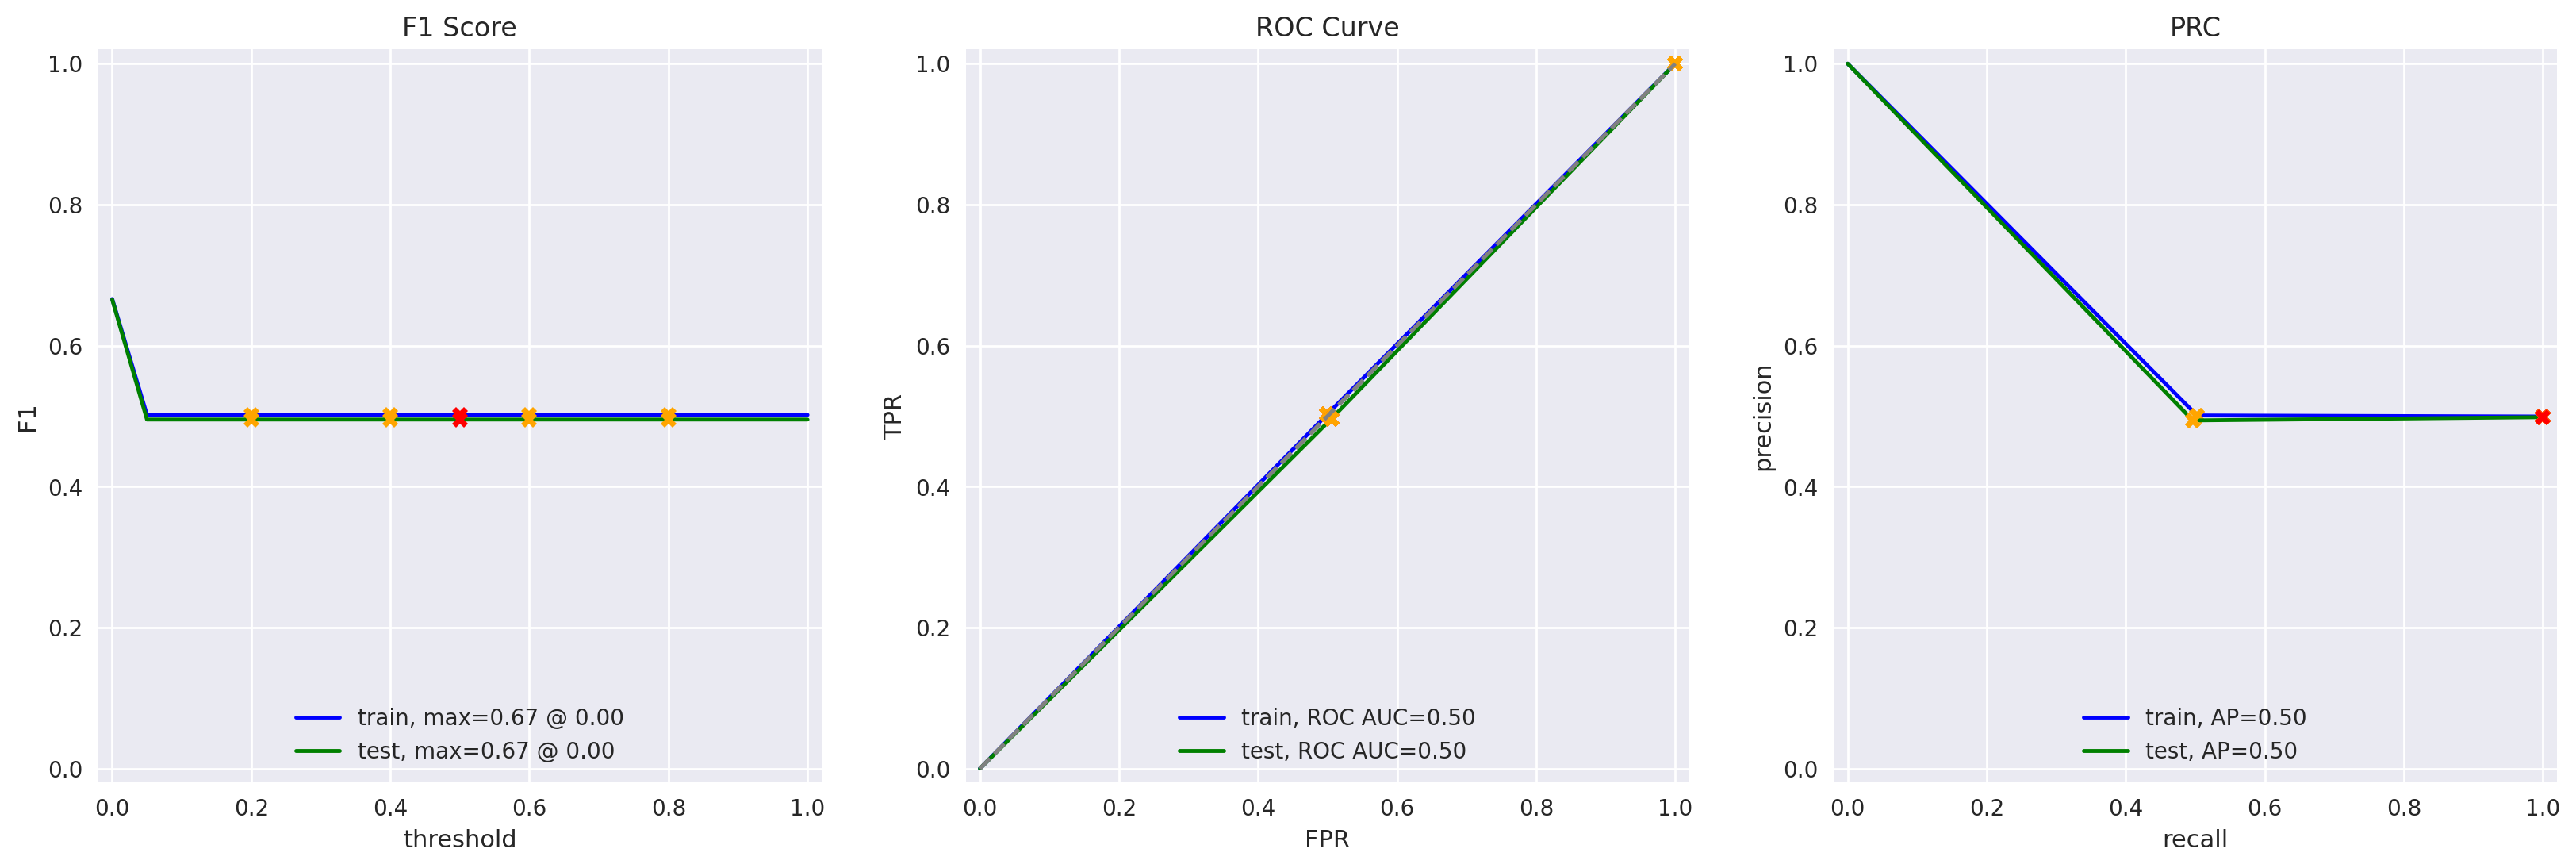

In [25]:
from sklearn.dummy import DummyClassifier

model_0 = DummyClassifier(strategy='stratified', random_state=12345)
model_0.fit(train_features, train_target)

evaluate_model(model_0, train_features, train_target, test_features, test_target)

Model 0 - DummyClassifier
```
          train  test
F1          0.5   0.5
```
This model is not expected to perform well and is well below the target of 0.85

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
Good. You can also check the result using different strategy values.
</div>

### Model 1 - NLTK, TF-IDF and LR

TF-IDF

In [26]:
import nltk

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [27]:
#Create lemmatization function.
def lemmatize(corpus):
    lemmatizer = WordNetLemmatizer()
    word_list = nltk.word_tokenize(corpus)
    lemmatized = ' '.join([lemmatizer.lemmatize(w) for w in word_list])
    return lemmatized

In [28]:
#Create list of stopwords.
stop_words = set(stopwords.words('english'))

#Create a TF-IDF vectorizer.
count_tf_idf = TfidfVectorizer(stop_words=stop_words)

train_features_1 = count_tf_idf.fit_transform(train_features)
test_features_1 = count_tf_idf.transform(test_features)

In [29]:
model_1 = LogisticRegression(random_state=12345)
model_1.fit(train_features_1, train_target)

LogisticRegression(random_state=12345)

          train  test
Accuracy   0.94  0.88
F1         0.94  0.88
APS        0.98  0.95
ROC AUC    0.98  0.95


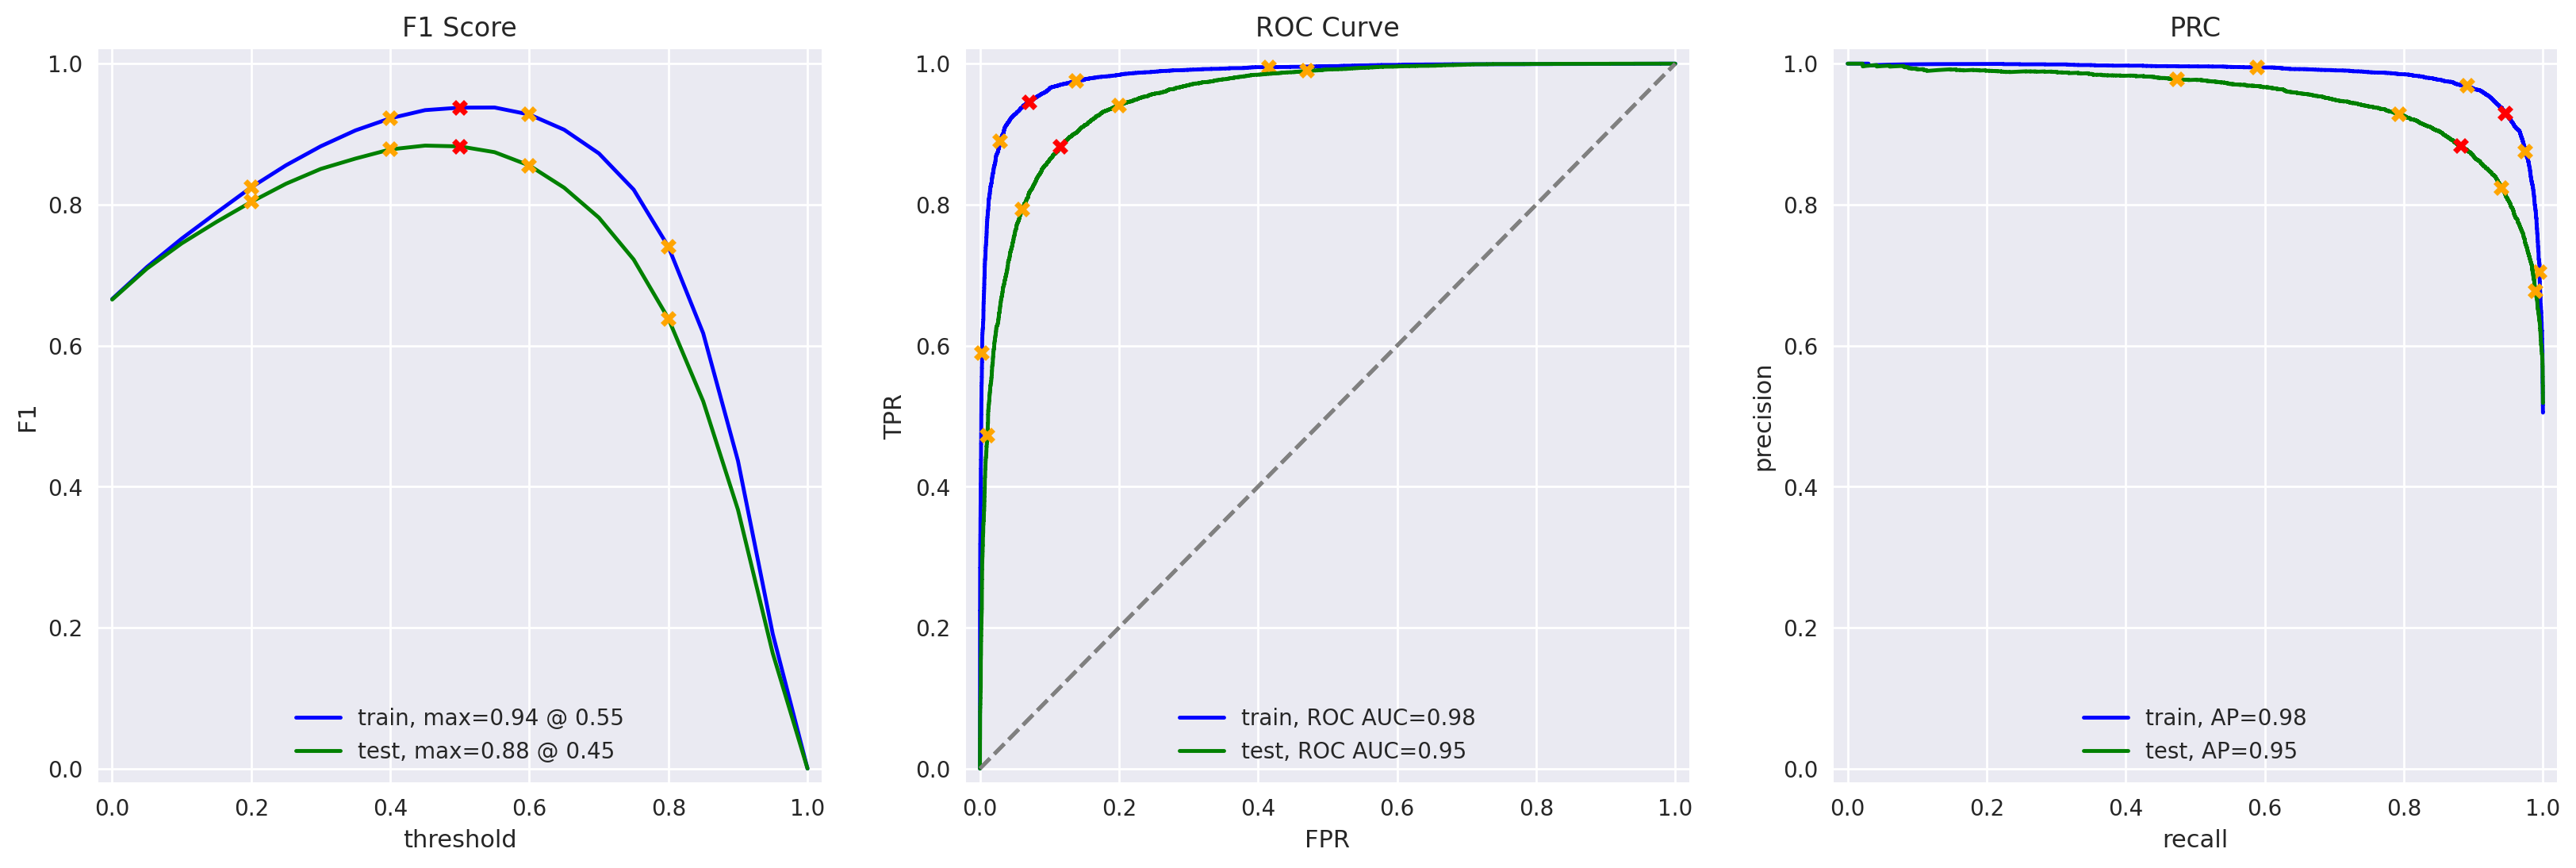

In [30]:
evaluate_model(model_1, train_features_1, train_target, test_features_1, test_target)

Model 1 - NLTK, TF-IDF and LR
```
          train  test
F1         0.94  0.88
```
This model is performing well with both the training and testing set achieving the target of 0.85.

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
Correct. The model exceeds the F1 threshold and has good precision. 
    
</div>

### Model 3 - spaCy, TF-IDF and LR

In [31]:
import spacy

nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

In [32]:
def text_preprocessing_3(text):
    
    doc = nlp(text)
    #tokens = [token.lemma_ for token in doc if not token.is_stop]
    tokens = [token.lemma_ for token in doc]
    
    return ' '.join(tokens)

In [33]:
reviews_train_spacy = train_features.progress_apply(text_preprocessing_3)
reviews_test_spacy = test_features.progress_apply(text_preprocessing_3)

  0%|          | 0/23796 [00:00<?, ?it/s]

  0%|          | 0/23535 [00:00<?, ?it/s]

In [34]:
stop_words = set(stopwords.words('english'))
count_tf_idf_3 = TfidfVectorizer(stop_words=stop_words)

train_features_3 = count_tf_idf_3.fit_transform(reviews_train_spacy)
test_features_3 = count_tf_idf_3.transform(reviews_test_spacy)

In [35]:
model_3 = LogisticRegression(random_state=12345)
model_3.fit(train_features_3, train_target)

LogisticRegression(random_state=12345)

          train  test
Accuracy   0.93  0.88
F1         0.93  0.88
APS        0.98  0.95
ROC AUC    0.98  0.95


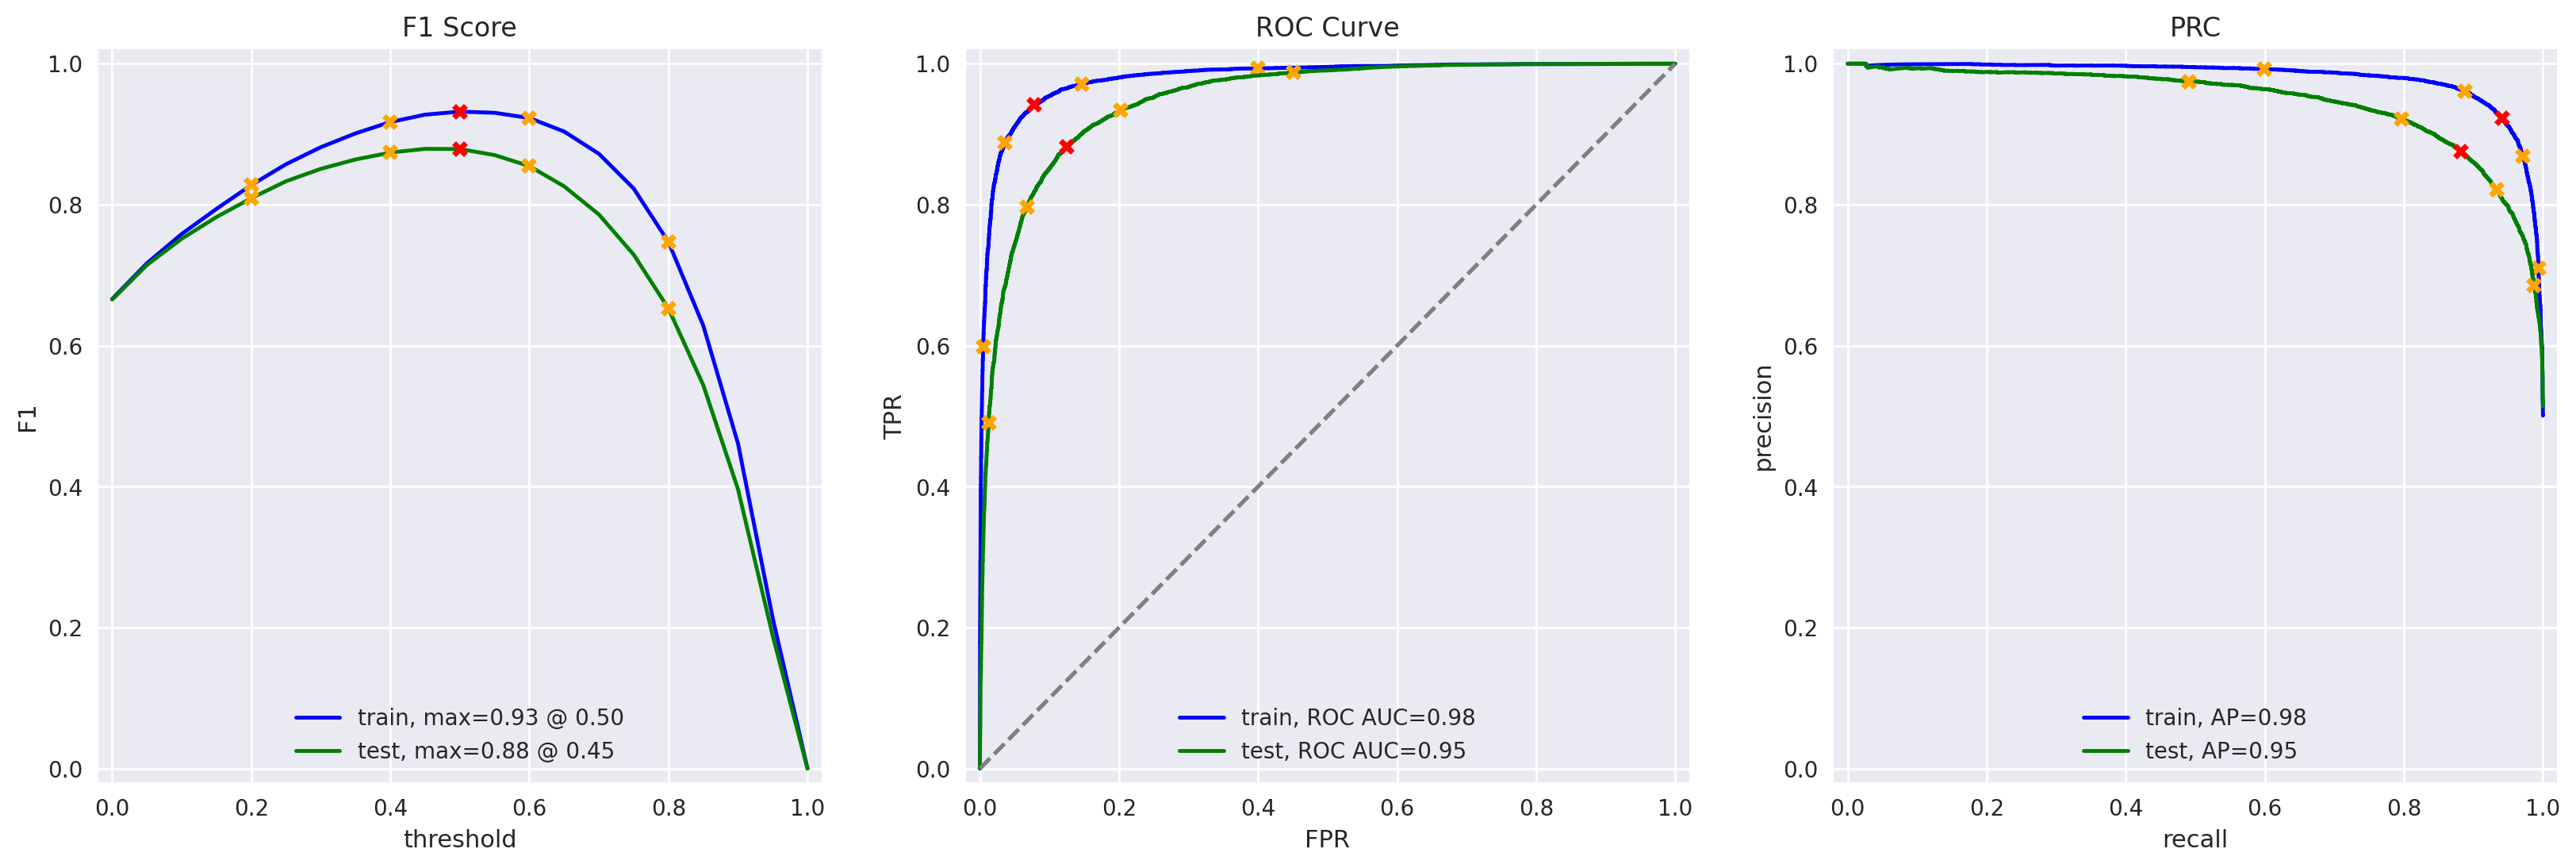

In [36]:
evaluate_model(model_3, train_features_3, train_target, test_features_3, test_target)

Model 3 - spaCy, TF-IDF and LR
```
          train  test
F1         0.93  0.88
```
This model is perfoming well. Both the training and testing set achieved the target of 0.85. However Model 1 performed slightly better in training.

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
We see quite similar performance. 
    
</div>

### Model 4 - spaCy, TF-IDF and LGBMClassifier

In [37]:
from lightgbm import LGBMClassifier

In [38]:
model_4 = LGBMClassifier(random_state=12345)
model_4.fit(train_features_3, train_target)

LGBMClassifier(random_state=12345)

          train  test
Accuracy   0.91  0.86
F1         0.91  0.86
APS        0.97  0.93
ROC AUC    0.97  0.94


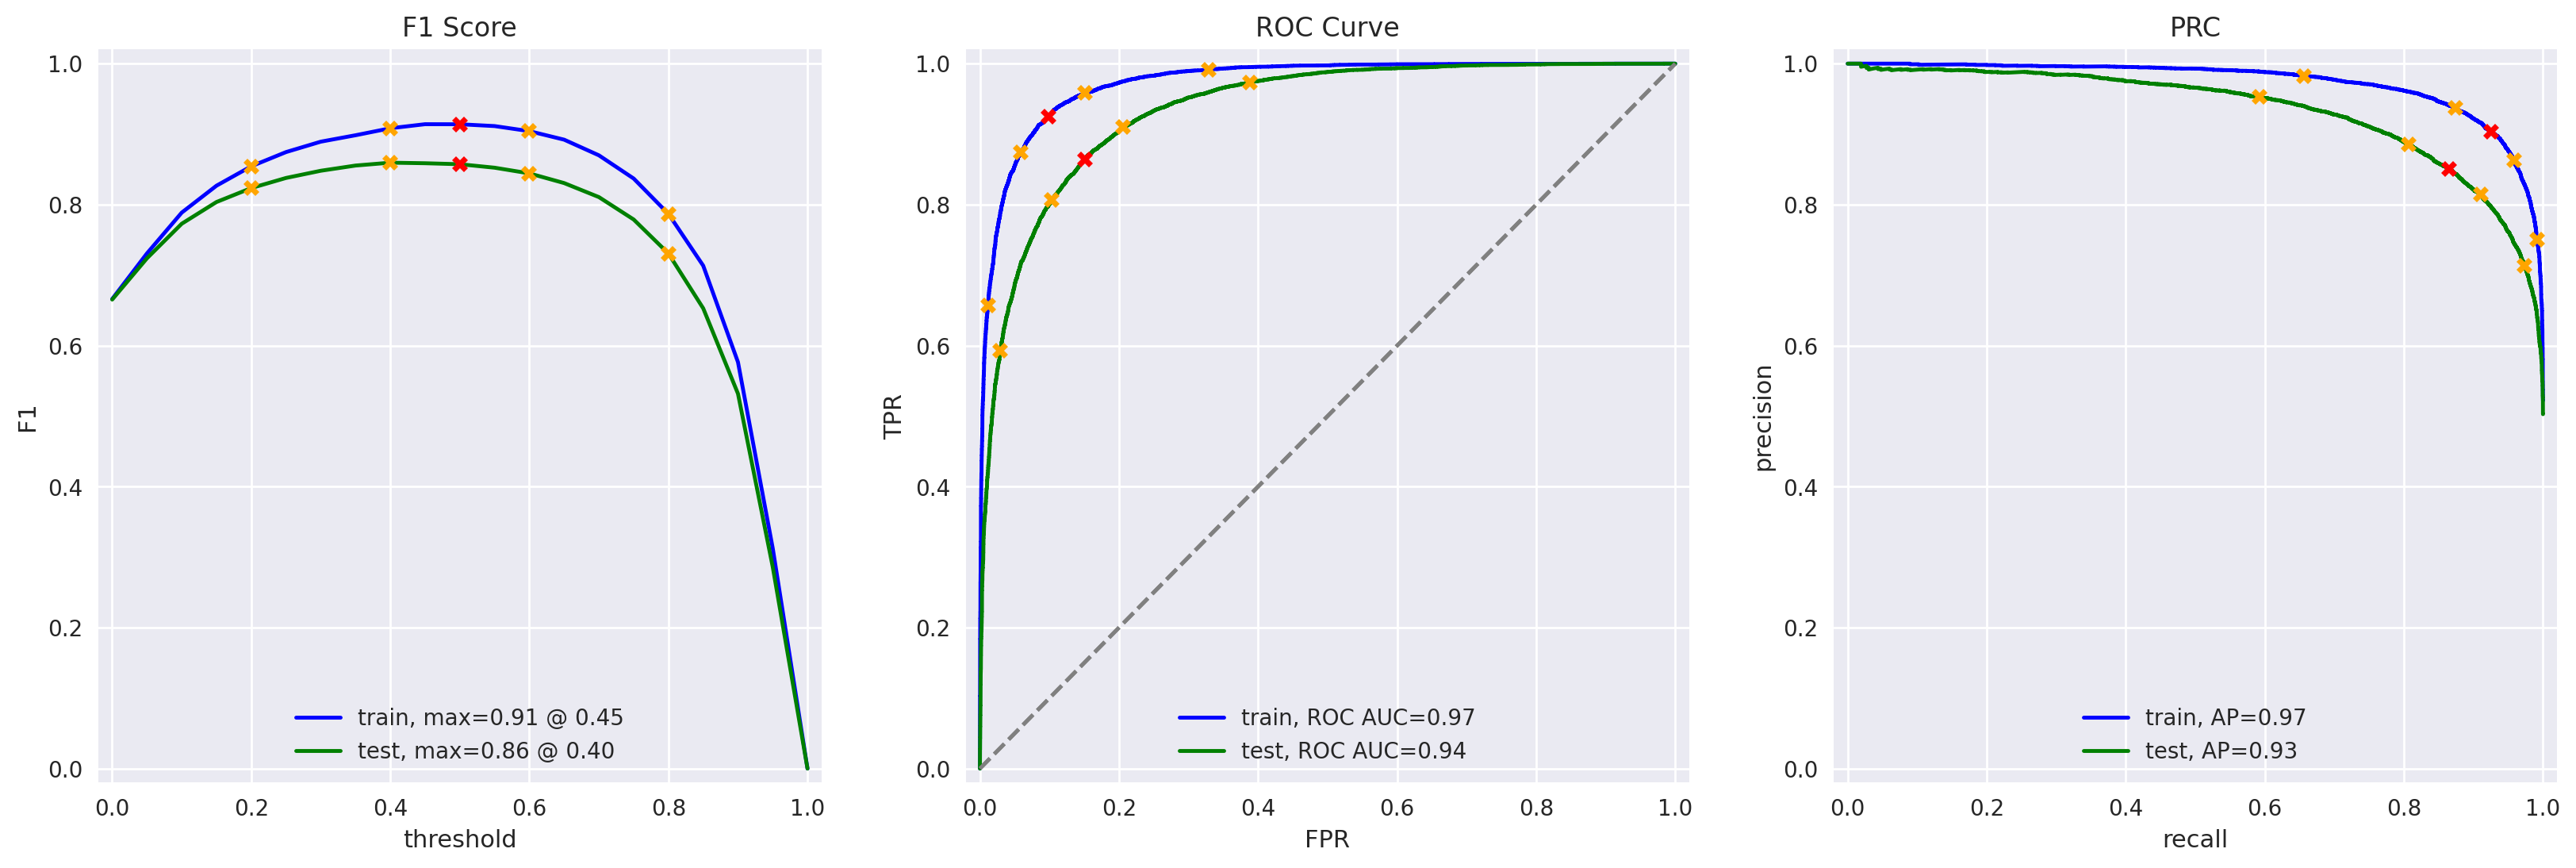

In [39]:
evaluate_model(model_4, train_features_3, train_target, test_features_3, test_target)


Model 4 spaCy, TF-IDF and LGBMClassifier
```
          train  test
F1         0.91  0.86
```
While both the training and testing achieved the target of 0.85, both Model 1 and Model 3 peformed better.

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
Good!     
</div>

###  Model 9 - BERT

In [40]:
import torch
import transformers

In [41]:
tokenizer = transformers.BertTokenizer.from_pretrained('bert-base-uncased')
config = transformers.BertConfig.from_pretrained('bert-base-uncased')
model = transformers.BertModel.from_pretrained('bert-base-uncased')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [42]:
def BERT_text_to_embeddings(texts, max_length=512, batch_size=8, force_device=None, disable_progress_bar=False):
    
    ids_list = []
    attention_mask_list = []

    # text to padded ids of tokens along with their attention masks
    
    for input_text in tqdm(texts, disable=disable_progress_bar):
        ids = tokenizer.encode(input_text.lower(), add_special_tokens=True, truncation=True, max_length=max_length)
        padded = np.array(ids + [0] * (max_length-len(ids)))
        attention_mask = np.where(padded != 0,1,0)
        ids_list.append(padded)
        attention_mask_list.append(attention_mask)
    
    if force_device is not None:
        device = torch.device(force_device)
    else:
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        
    model.to(device)
    if not disable_progress_bar:
        print(f'Using the {device} device.')
    
    # gettings embeddings in batches

    embeddings = []

    for i in tqdm(range(math.ceil(len(ids_list)/batch_size)), disable=disable_progress_bar):
        # Convert both lists to numpy arrays once, before the loop
        
        ids_array = np.array(ids_list)
        attention_mask_array = np.array(attention_mask_list)
        
        # Then in your loop:
        ids_batch = torch.LongTensor(ids_array[batch_size*i:batch_size*(i+1)]).to(device)
        attention_mask_batch = torch.LongTensor(attention_mask_array[batch_size*i:batch_size*(i+1)]).to(device)


        #ids_array = np.array(ids_list)
        #ids_batch = torch.LongTensor(ids_array[batch_size*i:batch_size*(i+1)]).to(device)
            
        #ids_batch = torch.LongTensor(ids_list[batch_size*i:batch_size*(i+1)]).to(device)
        #attention_mask_batch = torch.LongTensor(attention_mask_list[batch_size*i:batch_size*(i+1)]).to(device)
            
        with torch.no_grad():            
            model.eval()
            batch_embeddings = model(input_ids=ids_batch, attention_mask=attention_mask_batch)   
        embeddings.append(batch_embeddings[0][:,0,:].detach().cpu().numpy())
        
    return np.concatenate(embeddings)

In [61]:
# Attention! Running BERT for thousands of texts may take long run on CPU, at least several hours
#train_features_9 = BERT_text_to_embeddings(df_reviews_train['review_norm'], force_device='cuda')

sample_size=300

train_features_9 = BERT_text_to_embeddings(train_features.sample(n=sample_size, random_state=12345), force_device='cpu')
train_target_9 = train_target.sample(n=sample_size, random_state=12345)


  0%|          | 0/300 [00:00<?, ?it/s]

Using the cpu device.


  0%|          | 0/38 [00:00<?, ?it/s]

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
Yes, Bert is a hard thing to handle, so we should use GPU for it. By the way, you can use Colab for your practice tasks. It has some free GPU.

</div>

In [62]:
print(train_features.shape)
print(train_features_9.shape)
print(train_target_9.shape)

(23796,)
(300, 768)
(300,)


In [63]:
#test_features_9 = BERT_text_to_embeddings(df_reviews_test['review_norm'].sample(n=100, random_state=12345), force_device='cpu')
test_features_9 = BERT_text_to_embeddings(test_features.sample(n=sample_size, random_state=12345), force_device='cpu')
test_target_9 = test_target.sample(n=sample_size, random_state=12345)


  0%|          | 0/300 [00:00<?, ?it/s]

Using the cpu device.


  0%|          | 0/38 [00:00<?, ?it/s]

In [64]:
model_9 = LogisticRegression(solver='saga', max_iter=1000, random_state=12345)
model_9.fit(train_features_9, train_target_9)


LogisticRegression(max_iter=1000, random_state=12345, solver='saga')

          train  test
Accuracy    1.0  0.80
F1          1.0  0.80
APS         1.0  0.88
ROC AUC     1.0  0.88


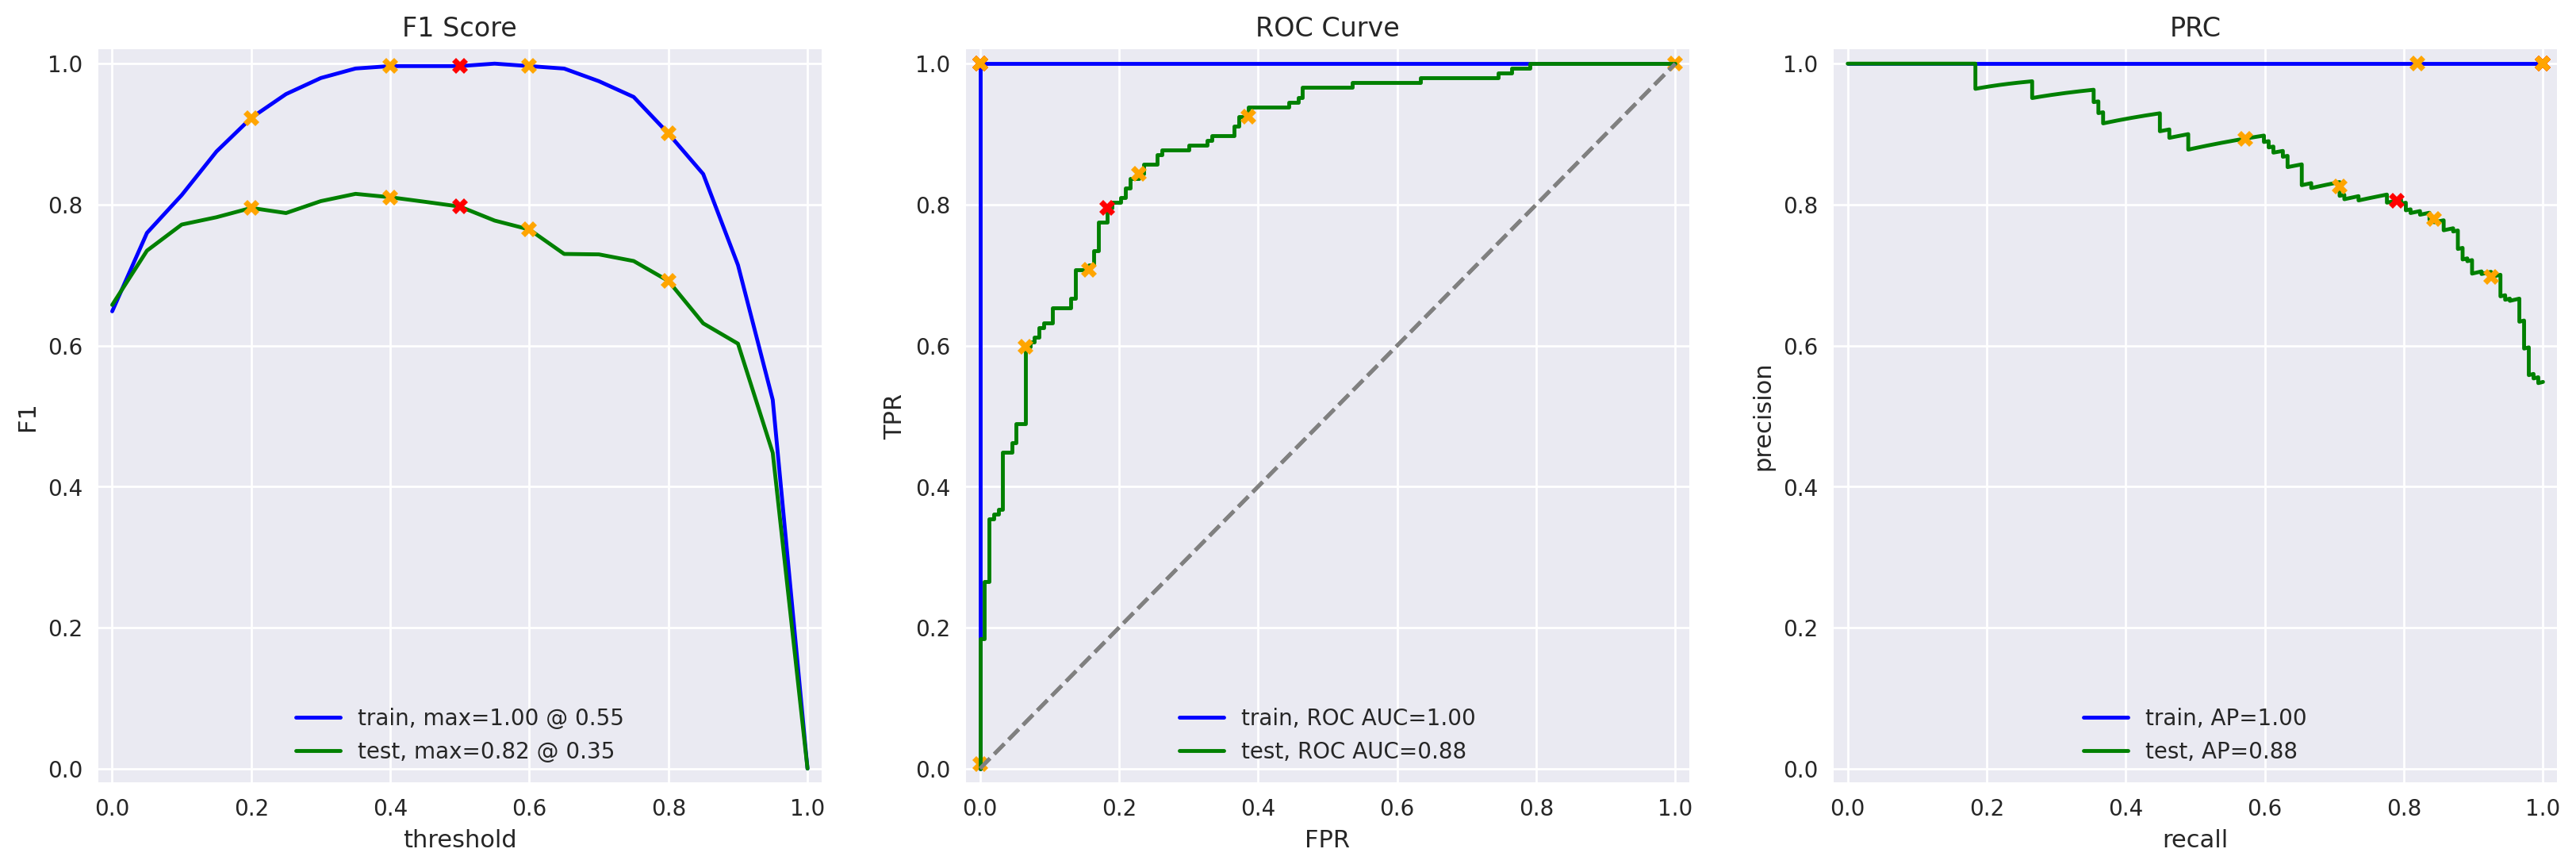

In [65]:
evaluate_model(model_9, train_features_9, train_target_9, test_features_9, test_target_9)


Model 9 - BERT
```
          train  test
F1          1.0  0.80
```
While the training set achieved an F1 score of 1, the test set was below the threshold with 0.80. It should be noted that the sample size was limited to 300 to prevent system crashing. Increasing the sample size would likely improve the results.

In [67]:
# if you have got the embeddings, it's advisable to save them to have them ready if 
# np.savez_compressed('features_9.npz', train_features_9=train_features_9, test_features_9=test_features_9)

# and load...
# with np.load('features_9.npz') as data:
#     train_features_9 = data['train_features_9']
#     test_features_9 = data['test_features_9']

Summary:
- The evaluation chriteria is to reach an F1 score of at least 0.85.
- Five models have been trained with the following results:
```
Model 0 - DummyClassifier
-           train  test
- Accuracy    0.5   0.5
- F1          0.5   0.5
- APS         0.5   0.5
- ROC AUC     0.5   0.5

Model 1 - NLTK, TF-IDF and LR
-           train  test
- Accuracy   0.94  0.88
- F1         0.94  0.88
- APS        0.98  0.95
- ROC AUC    0.98  0.95

Model 3 - spaCy, TF-IDF and LR
-           train  test
- Accuracy   0.93  0.88
- F1         0.93  0.88
- APS        0.98  0.95
- ROC AUC    0.98  0.95

Model 4 spaCy, TF-IDF and LGBMClassifier
-           train  test
- Accuracy   0.91  0.86
- F1         0.91  0.86
- APS        0.97  0.93
- ROC AUC    0.97  0.94

Model 9 - BERT
-           train  test
- Accuracy    1.0  0.80
- F1          1.0  0.80
- APS         1.0  0.88
- ROC AUC     1.0  0.88
```

- While Model 9 achieved the highest F1 score, 1, on the training set, the test set was below the target at 0.80. 
- Model 1 achieved an F1 score of 0.94 on the training set and 0.88 on the test set, making it hte highest performing model.


## My Reviews

In [68]:
# feel free to completely remove these reviews and try your models on your own reviews, those below are just examples

my_reviews = pd.DataFrame([
    'I did not simply like it, not my kind of movie.',
    'Well, I was bored and felt asleep in the middle of the movie.',
    'I was really fascinated with the movie',    
    'Even the actors looked really old and disinterested, and they got paid to be in the movie. What a soulless cash grab.',
    'I didn\'t expect the reboot to be so good! Writers really cared about the source material',
    'The movie had its upsides and downsides, but I feel like overall it\'s a decent flick. I could see myself going to see it again.',
    'What a rotten attempt at a comedy. Not a single joke lands, everyone acts annoying and loud, even kids won\'t like this!',
    'Launching on Netflix was a brave move & I really appreciate being able to binge on episode after episode, of this exciting intelligent new drama.'
], columns=['review'])

my_reviews['review_norm'] = my_reviews['review'].apply(normalize_review) # <put here the same normalization logic as for the main dataset>

my_reviews

,review,review_norm
0,"I did not simply like it, not my kind of movie.",i did not simply like it not my kind of movie
1,"Well, I was bored and felt asleep in the middl...",well i was bored and felt asleep in the middle...
2,I was really fascinated with the movie,i was really fascinated with the movie
3,Even the actors looked really old and disinter...,even the actors looked really old and disinter...
4,I didn't expect the reboot to be so good! Writ...,i didn't expect the reboot to be so good write...
5,"The movie had its upsides and downsides, but I...",the movie had its upsides and downsides but i ...
6,What a rotten attempt at a comedy. Not a singl...,what a rotten attempt at a comedy not a single...
7,Launching on Netflix was a brave move & I real...,launching on netflix was a brave move i really...


<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
Correct! 

</div>

### Model 1

In [69]:
texts = my_reviews['review_norm']

my_reviews_pred_prob = model_1.predict_proba(count_tf_idf.transform(texts))[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

0.14:  i did not simply like it not my kind of movie
0.16:  well i was bored and felt asleep in the middle of the movie
0.54:  i was really fascinated with the movie
0.11:  even the actors looked really old and disinterested and they got paid to be in the movie what a soul
0.31:  i didn't expect the reboot to be so good writers really cared about the source material
0.47:  the movie had its upsides and downsides but i feel like overall it's a decent flick i could see myse
0.04:  what a rotten attempt at a comedy not a single joke lands everyone acts annoying and loud even kids 
0.82:  launching on netflix was a brave move i really appreciate being able to binge on episode after episo


Model 1 - My Reviews
- There appears to be some room for improvement with this model:
- - 0.54:  i was really fascinated with the movie
- - 0.31:  i didn't expect the reboot to be so good writers really cared about the source material

### Model 3

In [70]:
texts = my_reviews['review_norm']

my_reviews_pred_prob = model_3.predict_proba(count_tf_idf_3.transform(texts.apply(lambda x: text_preprocessing_3(x))))[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

0.20:  i did not simply like it not my kind of movie
0.12:  well i was bored and felt asleep in the middle of the movie
0.49:  i was really fascinated with the movie
0.10:  even the actors looked really old and disinterested and they got paid to be in the movie what a soul
0.27:  i didn't expect the reboot to be so good writers really cared about the source material
0.50:  the movie had its upsides and downsides but i feel like overall it's a decent flick i could see myse
0.03:  what a rotten attempt at a comedy not a single joke lands everyone acts annoying and loud even kids 
0.92:  launching on netflix was a brave move i really appreciate being able to binge on episode after episo


Model 3 - My Reviews
- The same reviews appear to be off in Model 3 and Model 1:
- - 0.49:  i was really fascinated with the movie
- - 0.27:  i didn't expect the reboot to be so good writers really cared about the source material


### Model 4

In [71]:
texts = my_reviews['review_norm']

tfidf_vectorizer_4 = count_tf_idf_3
my_reviews_pred_prob = model_4.predict_proba(tfidf_vectorizer_4.transform(texts.apply(lambda x: text_preprocessing_3(x))))[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

0.53:  i did not simply like it not my kind of movie
0.40:  well i was bored and felt asleep in the middle of the movie
0.60:  i was really fascinated with the movie
0.38:  even the actors looked really old and disinterested and they got paid to be in the movie what a soul
0.73:  i didn't expect the reboot to be so good writers really cared about the source material
0.61:  the movie had its upsides and downsides but i feel like overall it's a decent flick i could see myse
0.26:  what a rotten attempt at a comedy not a single joke lands everyone acts annoying and loud even kids 
0.80:  launching on netflix was a brave move i really appreciate being able to binge on episode after episo


Model 4 - My Reviews
- This model is performing well with my reviews. While most scores appear reasonable, there are some exceptions:
- - 0.53:  i did not simply like it not my kind of movie

### Model 9

In [72]:
texts = my_reviews['review_norm']

my_reviews_features_9 = BERT_text_to_embeddings(texts, disable_progress_bar=True)

my_reviews_pred_prob = model_9.predict_proba(my_reviews_features_9)[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

0.05:  i did not simply like it not my kind of movie
0.00:  well i was bored and felt asleep in the middle of the movie
0.79:  i was really fascinated with the movie
0.00:  even the actors looked really old and disinterested and they got paid to be in the movie what a soul
0.37:  i didn't expect the reboot to be so good writers really cared about the source material
0.87:  the movie had its upsides and downsides but i feel like overall it's a decent flick i could see myse
0.02:  what a rotten attempt at a comedy not a single joke lands everyone acts annoying and loud even kids 
0.92:  launching on netflix was a brave move i really appreciate being able to binge on episode after episo


Model 9 - My Reviews
- The following lines have scores that are off of expectations:
- - 0.37:  i didn't expect the reboot to be so good writers really cared about the source material
- - 0.87:  the movie had its upsides and downsides but i feel like overall it's a decent flick i could see myse

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
    
Nice results! 
</div>


## Conclusions

Project Statement

- The Film Junky Union, a new edgy community for classic movie enthusiasts, is developing a system for filtering and categorizing movie reviews. The goal is to train a model to automatically detect negative reviews. You'll be using a dataset of IMBD movie reviews with polarity labelling to build a model for classifying positive and negative reviews. It will need to have an F1 score of at least 0.85.

EDA Summary:
- The dataset has been read.
- review is of type object and contains no missing values
- pos, the target, is of type int64 and contains no missing values

The following have been identified but have not been resolved as the anaylsis focuses only on the review and pos columns
- end_year has dates prior to start_year
- end_year contains '\N' instead of NAN values
- genres contains multiple categories seperated by a comma
- end_year is type object but should be int64
- runtime_minutes is type object but should be int64
- average_rating contains two null values
- votes contains two null values

Evaluation Summary:
- An evaluation procedure has been created.
- Reviews have been normalized with only lower case characters
- The data has been split.
- The evaluation chriteria is to reach an F1 score of at least 0.85.
- Five models have been trained with the following results:
```
Model 0 - DummyClassifier
-           train  test
- F1          0.5   0.5

Model 1 - NLTK, TF-IDF and LR
-           train  test
- F1         0.94  0.88

Model 3 - spaCy, TF-IDF and LR
-           train  test
- F1         0.93  0.88

Model 4 spaCy, TF-IDF and LGBMClassifier
-           train  test
- F1         0.91  0.86

Model 9 - BERT
-           train  test
- F1          1.0  0.80
```

- All models out performed the DummyClassifier.
- While the training set achieved an F1 score of 1, the test set was below the threshold with 0.80. It should be noted that the sample size was limited to 300 to prevent system crashing. Increasing the sample size would likely improve the results.
- Model 1 achieved an F1 score of 0.94 on the training set and 0.88 on the test set, making it hte highest performing model.
- When testing with my reviews there appeared to be room for improvement with all models.
- Future analysis could be expanded to identify outliers (in user scores, genres, etc), or combining the full dataset for modeling.

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    

Excellent, thank you so much! 

</div>


# Checklist

- [x]  Notebook was opened
- [x]  The text data is loaded and pre-processed for vectorization
- [x]  The text data is transformed to vectors
- [x]  Models are trained and tested
- [x]  The metric's threshold is reached
- [x]  All the code cells are arranged in the order of their execution
- [x]  All the code cells can be executed without errors
- [x]  There are conclusions